# <center>Homework Sheet 1</center>
# <center>VU Numerical Algorithms</center>

# Basic Guidelines - please read carefully!

<ul>
  <li> 
      Your homework report is <u>very important</u> for the grading of your homework. Your report has to provide a clear, well structured, compact and understandable summary of what you did for your homework and what the results are (including <u>well explained and understandable</u> figures of your experimental results).
  </li>
  <li> 
      For the programming parts, a correct implementation is not sufficient. If you do <u>not</u> provide a clear and well readable summary of your implementation and of your experiments, you will not get a good grade on the programming part.
  </li>
  <li>
      Due to the number of students in class, we cannot debug your code in case it produces wrong results. As a consequence, incorrect code in a programming part will always lead to zero points for this part, since it is not possible to find your
programming errors and distinguish between different implementation errors.
  </li>
  <li>
      In total, your report for this homework sheet may at most have <u>five pages</u> (just for the programming part, not including the Paper-and-Pencil exercises, which should be in the same document though). Anything beyond the fifth page will not be considered in the grading.
  </li>
  <li>
  You should do this assignment on your own - working in groups is NOT allowed. 
  </li>
</ul>

# Submission:
- Upload a `ipynb` file with all your source code and your report (in `markdown` with all plots and discussions of results as well as your solution to the paper-and-pencil exercises) on the course page in Moodle.
- Name your notebook `a<matriculation number>_<last name>.ipynb` (e.g. a01234567_Mustermann.ipynb)
- Additional files or folders are not allowed.

## Paper-and-Pencil Exercises

1. <u>(1 point)</u> The IEEE standard 754 (known as the “floating-point standard”) specifies the 128-bit word as having 15 bits for the exponent. <br>
What is the length of the fraction (mantissa)? What is the machine epsilon? How many significant decimal digits does this word have?<br>
Why is quadruple precision more than twice as accurate as double precision, which
is in turn more than twice as accurate as single precision?

2. <u>(2 points)</u> The IEEE standard 754 specifies that all arithmetic operations are to be performed as if they were first calculated to infinite precision and then rounded according to one of four modes. The default rounding mode is to round to the
nearest representable number, with rounding to even (zero least significant bit) in the case of a tie.  <br>
Which of the following statements is true in IEEE arithmetic, assuming that `a` and `b` are normalized floating point numbers and that no exception occurs in the stated operations? In each case, give a short explanation.

- `fl(a op b) = fl(b op a)`, `op = +, ∗.`
- `fl((a + b) + c) = fl(a + (b + c))`

#Paper-and-Pencil answers:
1)
- The length of the fraction (mantissa) is : $total \ words - the \ lenght\ of\ the\ exponent - \ sign \ bit = 128-15-1 = 112$.
- The machine epsilon is : $2^{-mantissa} = 2^{-112}$.
- The number of significant decimal digits does this word has is : with 113 bits of the mantissa, we can represent a decimal number that has a maximum of 37 digits. This number is: $\sum \limits _{i=0} ^{112} 9*2^{i}$.
- Quadruple precision is more than twice as accurate as double precision because its mantissa contains 113 bits, while the mantissa of the double precision contains 52 bits. The double precision is more than twice as accurate as the single precision because it has 16 bits in the mantissa. We can make the analogy with the truncation error of taylor series; the more terms we take, the more the precision we have.

2)
If we assume that the relative error (${\gamma}$) is always the same. In this case, the two statements are true:
- fl(a op b) = (1 + ${\gamma}$)(a + b) = (1 + ${\gamma}$)(b + a) = fl(b op a).
- fl((a + b) + c) = fl{(a(1 + ${\gamma}$) + b(1 + ${\gamma}$)) + c(1 + ${\gamma}$)} = (1 + 3${\gamma}$)(a + b + c) = fl(a + (b + c)).
But in reality the relative error is not the same. In this case, the first statement is true while the second is false because :
- fl(a op b) = (1 + ${\gamma}_{1}$)(a + b) = (1 + ${\gamma}_{1}$)(b + a)  = fl(b op a).
- fl((a + b) + c) = fl{(a(1 + ${\gamma}_{1}$) + b(1 + ${\gamma}_{2}$)) + c(1 + ${\gamma}_{3}$)}  !=  fl{a(1 + ${\gamma}_{3}$) + (b(1 + ${\gamma}_{1}$) + c(1 + ${\gamma}_{2})$)} = fl(a + (b + c))


## Programming Exercise

### Prerequisites
#### 1. Basics: <br>
- Please use Python version 3.5 or higher and indicate the Python version in your report. Your submission will be evaluated.
- Pay attention to the interface definitions, i.e., use the specified terms. In/output parameters must be in the specified order.
- Your routines should always check the number and types of input arguments.
- Do not plot results in predefined routines! Plot results in scripts or self defined routines only.
- Do not exploit any special structure in the input data. Your routines must be generic and have to work for all n > 1.
- Do not use any existing code which you did not write yourself!
- You can define your own routines in order to write modular code but please stay consistent with the predefined interface.
- Further, you can add more parameters, so you do not need to recompute parts of the program and accelerate your computation. However, you should add default parameters, so the program still works with the predefined parameters given in the assignment description.

#### 2. Interface: <br>
- Mandatory for ***all Parts***:

In [1]:
# Let us start by importing libraries
import numpy as np
import matplotlib.pyplot as plt
#from scipy.linalg import lu_factor, lu_solve
from scipy import linalg as lin
from scipy.linalg import lu as lu_scipy
#from scipy.linalg import lu_solve as lu_solve_scipy

Implement the function `accuracy` of the following form:
$$[z] = accuracy\;(x, y)$$
<u>Input</u>: $x$ and $y$ are either both $n \times n$ matrices or both vectors of size $n$. <br>
<u>Output</u>: scalar $z$, with:
$$z = \frac{\| x -y \|_1}{\| y \|_1}$$ <br>
Remark: Use this routine to verify the correctness of your LU factorization in Part I and to compute the relative forward error in Part II resp. Part III.

In [2]:
def accuracy(x, y):
    # TODO: Write your implementation of the function
    z = np.linalg.norm(x-y, 1)/np.linalg.norm(y, 1)
    return z

Implement the function `residual` of the following form:
$$[r] = residual\;(A, \hat{x}, b)$$
<u>Input</u>: $A$ is an $n \times n$ matrix, $\hat{x}$, b are vectors of size $n$. <br>
<u>Output</u>: scalar $r$, with:
$$z = \frac{\| A \hat{x} - b \|_1}{\| A \|_1 \| \hat{x} \|_1}$$ <br>
Remark: Use this routine to verify the correctness of your LU factorization in Part I and to compute relative residual in Part II resp. Part III.

In [3]:
def residual(A, x_hat, b):
    # TODO: Write your implementation of the function
    r = np.linalg.norm(np.dot(A,x_hat)-b, 1) / np.linalg.norm(A, 1) * np.linalg.norm(x_hat, 1)
    return r

- Mandatory for ***Part I***:

Implement the function `vector_summation` of the following form:
$$[s] = \text{vector_summation}(x)$$
<u>Input</u>: $x$ vectors of size $n$. <br>
<u>Output</u>: scalar $s$, with:
$$s = \sum_{i=0}^{n} x_i$$ <br>

In [4]:
def vector_summation(x,n=0):
    # TODO: Write your implementation of the function
    s = np.sum(x)
    return s

- Mandatory for ***Part II***:

Implement the functions `plu` and  `lu` (as well as `flu` for bonus points) for the LU factorization with partial pivoting (plu) and without pivoting (lu) (and full pivoting (flu)):
$$[A, P] = \text{plu}(A, n)$$
$$[A] = \text{lu}(A, n)$$
$$[A, P, Q] = \text{flu}(A, n)$$
<u>Input</u>: $n \times n$ matrix $A$, $n$. <br>
<u>Output</u>: $n \times n$ matrices $L$ and $U$ stored in the array $A$, and 

*   for `plu`: the permutation matrix $P$ $(A = P^T LU)$
*   for `clu`: the permutation matrices $P$ and $Q$ ($Q$ reorders the columns of $A$)


In [5]:
#In this cell, I am creating some extra useful functions in order to facilitate our work
def swapRows(v,i,j):
    if len(v.shape) == 1:
        v[i],v[j] = v[j],v[i]
    else:
        v[[i,j],:] = v[[j,i],:]
  

def getL(LU):
    n = LU.shape[0]
    L = LU.copy()
    for k in range(n):
        L[k,k] = 1
        L[k,k+1:] = 0
    return L

def getU(LU):
    n = LU.shape[0]
    U = LU.copy()
    for k in range(n):
        U[k,:k] = 0
    return U

def getP(p):
    P = np.empty( (len(p),len(p)) )
    I = np.identity( len(p) )
    for k, val in enumerate( p ):
        P[k,:] = I[val,:]
    return P

    

In [6]:
# In this cell, I am implementing LU and PLU decomposition

# LU decomposition
# The resulted matrix A has contains U in its upper triangle part and L in the upper one
# In some documentation it is notated as A = [U/L]
def lu(A,v=0):
    # TODO: Write your implementation of the function
    n = len(A)
    for k in range(0, n-1):
        for i in range(k+1, n):
            if A[i,k] !=0.0:
                temp = A[i,k]/A[k,k]
                A[i,k+1:n] = A[i,k+1:n] - temp*A[k,k+1:n] # upper triangle U
                A[i,k] = temp # lower triangle L
    return A

#PLU decomposition
def plu(A,v=0):

    LU = A.copy()
    n = LU.shape[0]
    
    # Set up scales factors and initialization of the permutation vector P
    scales = abs(LU).max(1)
    P = np.arange(n)
    
    for k in range(n-1):
        # Here, we search for the max of the column k
        z = np.argmax( abs( LU[k:,k] ) / scales[k:] )
        z = z + k
        # Here, we swap rows k and z and we update the permutation vector P
    
        swapRows(LU,k,z)
        swapRows(P,k,z)
        swapRows(scales,k,z)

        # Update the lower triangle L
        LU[k+1:,k] = LU[k+1:,k] / LU[k,k]

        # Update the upper triangle U
        LU[k+1:,k+1:] = LU[k+1:,k+1:] - np.outer( LU[k+1:,k], LU[k,k+1:] )

    return (P,LU)




#def plu(A, n):
 #   # TODO: Write your implementation of the function
  #  P = ...
   # return A, P

def flu(A, n):
    # TODO as bonus: Write your implementation of the function
    P = ...
    Q = ...
    return A, P, Q

- Mandatory for ***Part III***:

Implement two functions `solveL`, and `solveU` for solving a lower / upper triangular system:
$$[x] = \text{solveL}(B, b, n)$$
$$[x] = \text{solveU}(B, b, n)$$
<u>Input</u>: $n \times n$ matrix $B$, the right hand side vector $b$ of size $n$. <br>
<u>Output</u>: the solution vector $x$ <br>
Remark: The input matrix $B$ has special structure $B = L + U − I$, where $L$ (with fixed ones in the diagonal) and $U$ are lower and resp. upper triangular matrices and $I$ is the Identity.

In [7]:

def solveL(L, b,v=0):
    # TODO: Write your implementation of the function
    n = len(L)
    for k in range(1,n):
        b[k] = b[k] - np.dot(U[k,0:k],b[0:k])
    b[n-1] = b[n-1]/U[n-1,n-1]

    return b


def solveU(U, b,v=0):
    # TODO: Write your implementation of the function
    n = len(U)
    for k in range(n-2,-1,-1):
        b[k] = (b[k]-np.dot(A[k,k+1:n], b[k+1:n]))/A[k,k]

    
    return b

#  solves Ay = Pb
def forward_substitution(A,b,P):
    
    n = A.shape[0]
    
    # permute b following the permutations stored in the vector P
    y = b.copy()
    perm_b = y[P]
    
    # substitution
    for k in range(n):
        y[k] = perm_b[k] - np.dot( A[k,:k], y[:k] )
    return y



def back_substitution(A,b):
    n = A.shape[0]
    x = b.copy()
    for k in range(n)[::-1]:
        x[k] = ( b[k] - np.dot( A[k,k+1:], x[k+1:] ) ) / A[k,k]
    return x



- Mandatory for ***Part IV***:

Implement the function `linSolve` for solving a linear system:
$$[x] = \text{linSolve}(A, b, n)$$
<u>Input</u>: $n \times n$ nonsingular matrix $A$, the right hand side vector b of size $n$. <br>
<u>Output</u>: The solution vector $x$.
Remark: This function must incorporate **plu**, **solveL** and **solveU** from previous Parts!

In [8]:
def LinSolveLU(A,b,v=0):
    n = len(A)
    LU = lu(A)
    for k in range(1,n):
        b[k] = b[k] - np.dot(LU[k,0:k],b[0:k])
    b[n-1] = b[n-1]/LU[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k]-np.dot(A[k,k+1:n], b[k+1:n]))/LU[k,k]
    return b

# solving Ax = b using forward and back substitutions 
def linSolve(A,b,v=0):
    P,LU = plu(A)  
    y = forward_substitution(LU,b,P)
    x = back_substitution(LU,y)
    return x


The ***programming exercise** consists of testing numerical stability for summation and implementing an LU factorization-based linear solver in Python and to evaluate its accuracy for various test matrices. The solver consists of computing the LU decomposition of a square n × n double precision matrix A such that P A = LU with a permutation matrix P , lower triangular L and upper triangular U and subsequent forward and back substitution. In particular you need to implement the follwoing:

#### Part I - Summing Numbers of Different Magnitudes <u>(3 points)</u>
Generate numbers with different orders of magnitude as well as all of these numbers should have at least 8 decimal places, then append them to a vector $v$. Sum up all the elements in a different order.

What's the best order that you should sum up the vector $v$?

In [9]:
# TODO: Create the list and use a function call to vector_summation
# I generate the numbers using a arithmetic progression serie 
# This function returns the terms stored in an array and the theoretical sum 
def arithmetic_progression_serie(term , common_ratio , size):
    U = np.zeros(size)
    U[0] = term
    for i in range(size - 1):
        term += common_ratio
        U[i+1] = term
    theoretical_sum = (size) * ((U[0] + U[size-1]) / 2)
    return U, theoretical_sum

In [10]:
# Here I will calculate the approximated sum in ascending and descending order.
U,theoretical_sum = arithmetic_progression_serie(1e-10, 2, 10000)
ascending_approximated_sum = vector_summation(U)
#Y = U[::-1]
Y = np.flip(U)
descending_approximated_sum = vector_summation(Y)

print("theoretical_sum = ",theoretical_sum)
print("ascending_approximated_sum = ",ascending_approximated_sum)
print("descending_approximated_sum = ",descending_approximated_sum)
# The best order is the ascending one

theoretical_sum =  99990000.000001
ascending_approximated_sum =  99990000.000001
descending_approximated_sum =  99990000.00000101


# Report part 1
### Introduction
- In this part, our goal is to find the best order to sum up the vector v
### Summary
- I generate the numbers using a arithmetic progression serie 
- This function returns the terms stored in an array and the theoretical sum
### Discussion and interpretation
- Afetr computing the ascending and the descending approximated sum, it is clear that the
- ascending approximated sum is the closed one to the theoretical sum

#### Part II - LU Decomposition <u>(4 points + 2 bonus points)</u>
First implement the standard ”scalar” (unblocked) algorithm (i.e. three nested loops) in two versions: 
- with partial pivoting
- without partial pivoting, and (for comparison purposes)
- (Optional) with full pivoting <u>(2 bonus points)</u>.


<img src="https://ucloud.univie.ac.at/index.php/s/AxTjNzBpKYi4FNd/download" alt="lu_Decomposition" width="800" />

- $U$ is contained in the upper triangle (plus diagonal) of $A$, and the diagonal entries of $L$ are all 1. The subdiagonal entries of $L$ are given by the scalars $m_{ik}$ (i.e. $L(i, k)$ = $m_{ik}$). For storage efficiency, we can store $L$ in the lower triangle of $A$, and thus $A(i, k)$ has to be overwritten with $m_{ik}$ (see Algorithm 1).

Detailed remarks:

1. Accuracy: Verify the correctness of your LU factorization by evaluating the relative residual
$$ r = \frac{\| P^{T}LU - A \|_1}{\| A \|_1}$$
where $\| \; . \; \|_1$ is the maximum absolute column sum of a matrix:
$$ \| M \|_1 = \max_{j=1,\dots,n} \Sigma_{i=1}^{n} |M_{ij}|$$
Plot these residuals $r$ for all problem sizes you experimented with. <u>When plotting residuals, always use a **logarithmic scale** along the **y-axis**! </u>
2. Use randomly generated matrices $A$ as input, but please specify clearly in your report how you generated your test matrices!

In [11]:
def residual2(PtLU, A):
    r = np.linalg.norm(PtLU-A, 1) / np.linalg.norm(A, 1)
    return r

In [12]:

risidual_error_PLU = []

for i in range(2,10,1):
    A = np.random.rand(i,i)
    # verify if A is non singular
    if np.linalg.det(A):
        
        x = np.ones(i)
        b = np.dot(A,x)
        
        A0 = A.copy()
        b0 = b.copy()
        
        P,LU = plu(A0)
        PtLU = np.dot(np.dot( getP(P).T, getL(LU) ), getU(LU))

        risidual_error_PLU.append(residual2(PtLU, A)) 

for i in range(11,200,5):
    A = np.random.rand(i,i)
    # verify if A is non singular
    if np.linalg.det(A):
        
        x = np.ones(i)
        b = np.dot(A,x)
        
        A0 = A.copy()
        b0 = b.copy()
        
        P,LU = plu(A0)
        PtLU = np.dot(np.dot( getP(P).T, getL(LU) ), getU(LU))

        risidual_error_PLU.append(residual2(PtLU, A))  
    
#decreasing the step of the third loop if wanted to get more iterations
for i in range(201,1000,100):    
    A = np.random.rand(i,i)
    # verify if A is non singular
    if np.linalg.det(A):
        
        x = np.ones(i)
        b = np.dot(A,x)
        
        A0 = A.copy()
        b0 = b.copy()
        
        P,LU = plu(A0)
        PtLU = np.dot(np.dot( getP(P).T, getL(LU) ), getU(LU))

        risidual_error_PLU.append(residual2(PtLU, A)) 


/home/moh/anaconda3/envs/python38/lib/python3.8/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


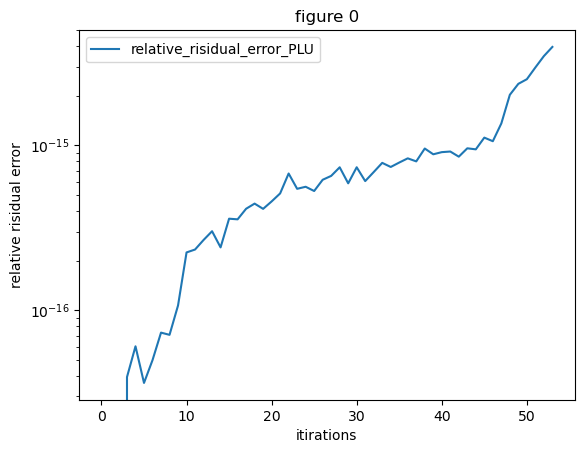

In [13]:
plt.figure() 

plt.plot(risidual_error_PLU, label='relative_risidual_error_PLU')
plt.yscale("log")
# Extra information
plt.title('figure 0') # titre
plt.xlabel('itirations') # axes
plt.ylabel('relative risidual error') # axes
plt.legend() # legend

plt.show() # affiche la figure

# Report part 2
### Introduction
- Before part1, I implemented the standard ”scalar” (unblocked) algorithm (i.e. three nested loops) in two versions: 
- with partial pivoting (PLU)
- without partial pivoting (LU)

- I modified the some steps to fit python logic, my programming style and my understanding of the problem
### Summary
- I started by creating a variante of risidual function which is risidual2, to adapt it to our new norm.
- Then I used 3 different for loops to generate random matrices and I used different steps in each loop as requested
- In each iteration, I copy the generated matrix A and the generated vector b in case my
  functions(in this part or the other parts) changed them.
- I called my plu function and I computed the relative risidual error with plu's output as requested
- I plot the results unsing a logarithmic scale in y_axis.

### Discussion and interpretation
- The plot shows that the relative risidual error is increasing when we have more iterations.
- I did not use a big number of iterations because it will take a lot of time to run the plot
- But the number of iterations can easily be changed by decreasing the step of the third loop

#### Part III - Solving Triangular Linear Systems <u>(2 points)</u>

1. **Forward substitution**: Write a routine which solves a given $n \times n$ lower triangular linear system $Lx = b$ for $x$.
2. **Back substitution**: Write another routine which solves a given $n \times n$ upper triangular linear system $Ux = b$ for $x$.
3. **Evaluate the accuracy** of your codes for increasing $n$ in terms of the relative residual and the relative forward error. Start with $n = 2, 3, 4, 5, \dots , 10$, then increase in increments of $5$. For $n > 50$ you can further increase the increment. The largest value of n should be as large as possible (so that your code terminates within a reasonable time), <u>but at least $n ≥ 1000$. (For the definition of relative residual and relative forward error please see Part IV!)</u> </br>
For these experimental evaluations, use randomly generated (non-singular) $L$ and $U$ and determine $b$ such that the exact solution $x$ is a vector of all ones: $x = (1, 1, . . . , 1, 1)^T$ .

In [14]:
# TODO: Write your implementation here (use function calls to the respective functions defined beforehand)
# The forward and back substitutions were written above and I will use the solver of PLU and LU directly 
# which they contain they use The forward and back substitutions
accuracy_list_LU = []
accuracy_list_PLU = []
risidual_list_LU = []
risidual_list_PLU = []

for i in range(2,10,1):
    A = np.random.rand(i,i)
    # verify if A is non singular
    if np.linalg.det(A):
        
        x = np.ones(i)
        b = np.dot(A,x)
        
        A1 = A.copy()
        A2 = A.copy()
        b1 = b.copy()
        b2 = b.copy()
        
        x_hatLU = LinSolveLU(A1,b1)
        x_hatPLU = linSolve(A2,b2)
        
        accuracy_list_LU.append(accuracy(x, x_hatLU))
        accuracy_list_PLU.append(accuracy(x, x_hatPLU))
        
        risidual_list_LU.append(residual(A, x_hatLU, b))
        risidual_list_PLU.append(residual(A, x_hatPLU, b))    
        

for i in range(11,200,5):
    A = np.random.rand(i,i)
    if np.linalg.det(A):
        
        x = np.ones(i)
        b = np.dot(A,x)
        
        A1 = A.copy()
        A2 = A.copy()
        b1 = b.copy()
        b2 = b.copy()
        
        x_hatLU = LinSolveLU(A1,b1)
        x_hatPLU = linSolve(A2,b2)
        
        accuracy_list_LU.append(accuracy(x, x_hatLU))
        accuracy_list_PLU.append(accuracy(x, x_hatPLU))
        
        risidual_list_LU.append(residual(A, x_hatLU, b))
        risidual_list_PLU.append(residual(A, x_hatPLU, b))
# I choosed a larg step only to make the plot run faster    
for i in range(201,1000,100):
    A = np.random.rand(i,i)
    if np.linalg.det(A):
        
        x = np.ones(i)
        b = np.dot(A,x)
        
        A1 = A.copy()
        A2 = A.copy()
        b1 = b.copy()
        b2 = b.copy()
        
        x_hatLU = LinSolveLU(A1,b1)
        x_hatPLU = linSolve(A2,b2)
        
        accuracy_list_LU.append(accuracy(x, x_hatLU))
        accuracy_list_PLU.append(accuracy(x, x_hatPLU))
        
        risidual_list_LU.append(residual(A, x_hatLU, b))
        risidual_list_PLU.append(residual(A, x_hatPLU, b))  
    
    


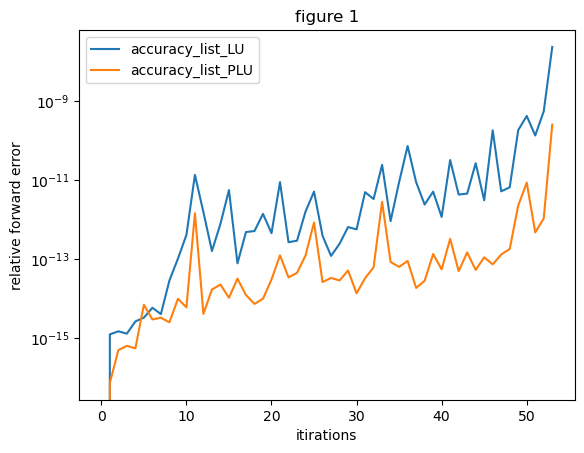

In [15]:
plt.figure() 

plt.plot(accuracy_list_LU, label='accuracy_list_LU')
plt.plot(accuracy_list_PLU, label='accuracy_list_PLU')
plt.yscale("log")
# Extra information
plt.title('figure 1') # titre
plt.xlabel('itirations') # axes
plt.ylabel('relative forward error') # axes
plt.legend() # legend

plt.show() # affiche la figure

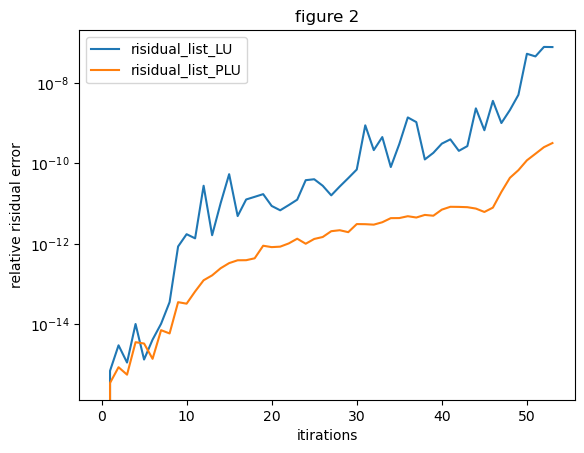

In [16]:
plt.figure() 

plt.plot(risidual_list_LU, label='risidual_list_LU')
plt.plot(risidual_list_PLU, label='risidual_list_PLU')
plt.yscale("log")
# Extra information
plt.title('figure 2') # titre
plt.xlabel('itirations') # axes
plt.ylabel('relative risidual error') # axes
plt.legend() # legend

plt.show() # affiche la figure

# Report part 3
### Introduction
- Before part1, I implemented the two solvers for LU and PLU which both use forward and back subtitutions

### Summary
- I used 3 different for loops to generate random matrices and I used different steps in each loop as
- requested
- In each iteration, I copy the generated matrix A and the generated vector b in case my
- functions(in this part or the other parts) changed them.
- I called my plu and my LU solvers functions and I computed the relative risidual error and the relative forward error in each iteration.
- I plot the relative forward error of LU and PLU in one figure.
- - I plot the relative risidual error of LU and PLU in another figure.
- I plot the results unsing a logarithmic scale in y_axis.

### Discussion and interpretation
- The first graph shows that the LU's relative forward error is bigger than PLU's when the iterations increase.
- The second plot shows that the LU's relative risidual error is bigger than PLU's when the iterations increase.
- As a result, PLU decomposition is better beacause it has a lower relative forward and risidual error.

#### Part IV - Numerical Accuracy of LU-Based Linear Solve <u>(4 points + 1 bonus point)</u>

The main purpose of this part is to experimentally evaluate the numerical accuracy of the linear systems solver you implemented in Parts $I$ and $II$ <u> with and without partial pivoting </u> as well as full pivoting (for one bonus point) for different test matrices and to compare it with the built-in solver from `scipy.linalg` (using the `p, l, u = lu(A)`).

1. Take your LU factorization from Part **I** and combine it with your triangular linear systems solvers from Part **II** in order to get a complete LU-based linear solver.
2. Input data for your experiments:
    - Generate random test matrices S with entries uniformly distributed in the interval $[-1,1]$.
    - Generate test matrices H which are defined by: $H_{ij} := \frac{1}{i+j-1} \quad for \;i=1,\dots,n \; \mbox{and} \; j=1, \dots, n$.
    - In all your test cases, determine the corresponding right hand side b of length n such that the exact solution x of the linear system is a vector of all ones: $x = (1, 1, . . . , 1, 1)^T$.
3. Solve the linear systems $Sx = b$ and $Hx = b$ with your LU-based linear solver <u>with and without partial pivoting</u> and also with the built-in `scipy.linalg` using the `p, l, u = lu(A)` solver and compare the numerical accuracy of the computed solutions.
    - Problem sizes: Start with $n = 2, 3, 4, 5, \dots , 10$, then increase in increments of $5$. For $n > 50$ you can further increase the increment. The largest value of $n$ should be as large as possible (so that your code terminates within a reasonable time), but at least $n ≥ 1000$.
    - Accuracy: For the computed solution ˆx, evaluate the relative residual $\tilde{r}$
    $$\tilde{r} = \frac{\| M \tilde{x} - b \|_1}{\| M \|_1 \| \tilde{x} \|_1}$$
    (M is S or H) as well as the relative forward error $f$ :
    $$f = \frac{\| \tilde{x} - x \|_1}{\| x \|_1 }$$
4. For both your and the `scipy.linalg` solver generate the following plots for the different test matrices:
     - Relative residual and relative forward error in $\hat{x}$ vs. $n$: One figure for both accuracy metrics for matrix type $S$ (including with and without partial pivoting), another figure for both accuracy metrics for matrix type $H$ (including with and without partial pivoting).
5. Interpret and explain your experimental results in your report. Do you think that there is a fundamental difference in the numerical accuracy which your LU-based linear solver achieves for the two types of test matrices? If yes, explain the reasons for this difference. What effect does (partial/full) pivoting have?  
Also, compare with the `scipy.linalg` built-in solver.

In [17]:
# TODO: Write your implementation here (use function calls to the respective functions defined beforehand)

part3_accuracy_list_LU = []
part3_accuracy_list_PLU = []
part3_accuracy_list_scipy = []

part3_risidual_list_LU = []
part3_risidual_list_PLU = []
part3_risidual_list_scipy = []

for i in range(2,10,1):
    S = np.random.uniform(low=-1,high=1, size=(i, i))
    # verify if S is non singular
    if np.linalg.det(S):
        
        x_part3 = np.ones(i)
        b = np.dot(S,x_part3)
        
        S1 = S.copy()
        S2 = S.copy()
        S3 = S.copy()
        b1 = b.copy()
        b2 = b.copy()
        b3 = b.copy()
        
        x_hatLU = LinSolveLU(S1,b1)
        x_hatPLU = linSolve(S2,b2)
        Pscipy,Lscipy,Uscipy = lu_scipy(S3)
        x_hatScipy = lin.solve(Uscipy, lin.solve(Lscipy, np.transpose(Pscipy)@b3))
        
        part3_accuracy_list_LU.append(accuracy(x_part3, x_hatLU))
        part3_accuracy_list_PLU.append(accuracy(x_part3, x_hatPLU))
        part3_accuracy_list_scipy.append(accuracy(x_part3, x_hatScipy))
        
        part3_risidual_list_LU.append(residual(S, x_hatLU, b))
        part3_risidual_list_PLU.append(residual(S, x_hatPLU, b))
        part3_risidual_list_scipy.append(residual(S, x_hatScipy, b))

for i in range(11,200,5):
    S = np.random.uniform(low=-1,high=1, size=(i, i))
    # verify if S is non singular
    if np.linalg.det(S):
        
        x_part3 = np.ones(i)
        b = np.dot(S,x_part3)
        
        S1 = S.copy()
        S2 = S.copy()
        S3 = S.copy()
        b1 = b.copy()
        b2 = b.copy()
        b3 = b.copy()
        
        x_hatLU = LinSolveLU(S1,b1)
        x_hatPLU = linSolve(S2,b2)
        Pscipy,Lscipy,Uscipy = lu_scipy(S3)
        x_hatScipy = lin.solve(Uscipy, lin.solve(Lscipy, np.transpose(Pscipy)@b3))
        
        part3_accuracy_list_LU.append(accuracy(x_part3, x_hatLU))
        part3_accuracy_list_PLU.append(accuracy(x_part3, x_hatPLU))
        part3_accuracy_list_scipy.append(accuracy(x_part3, x_hatScipy))
        
        part3_risidual_list_LU.append(residual(S, x_hatLU, b))
        part3_risidual_list_PLU.append(residual(S, x_hatPLU, b))
        part3_risidual_list_scipy.append(residual(S, x_hatScipy, b))    

for i in range(201,1000,100): 
    S = np.random.uniform(low=-1,high=1, size=(i, i))
    # verify if S is non singular
    if np.linalg.det(S):
        
        x_part3 = np.ones(i)
        b = np.dot(S,x_part3)
        
        S1 = S.copy()
        S2 = S.copy()
        S3 = S.copy()
        b1 = b.copy()
        b2 = b.copy()
        b3 = b.copy()
        
        x_hatLU = LinSolveLU(S1,b1)
        x_hatPLU = linSolve(S2,b2)
        Pscipy,Lscipy,Uscipy = lu_scipy(S3)
        x_hatScipy = lin.solve(Uscipy, lin.solve(Lscipy, np.transpose(Pscipy)@b3))
        
        part3_accuracy_list_LU.append(accuracy(x_part3, x_hatLU))
        part3_accuracy_list_PLU.append(accuracy(x_part3, x_hatPLU))
        part3_accuracy_list_scipy.append(accuracy(x_part3, x_hatScipy))
        
        part3_risidual_list_LU.append(residual(S, x_hatLU, b))
        part3_risidual_list_PLU.append(residual(S, x_hatPLU, b))
        part3_risidual_list_scipy.append(residual(S, x_hatScipy, b))    

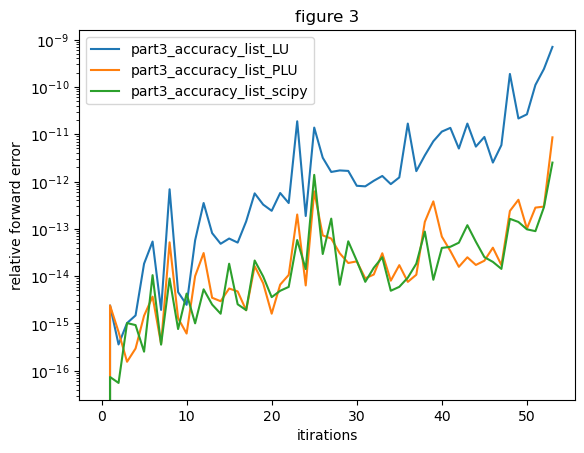

In [18]:
plt.figure() 

plt.plot(part3_accuracy_list_LU, label='part3_accuracy_list_LU')
plt.plot(part3_accuracy_list_PLU, label='part3_accuracy_list_PLU')
plt.plot(part3_accuracy_list_scipy, label='part3_accuracy_list_scipy')
plt.yscale("log")
# Extra information
plt.title('figure 3') # titre
plt.xlabel('itirations') # axes
plt.ylabel('relative forward error') # axes
plt.legend() # legend

plt.show() # affiche la figure

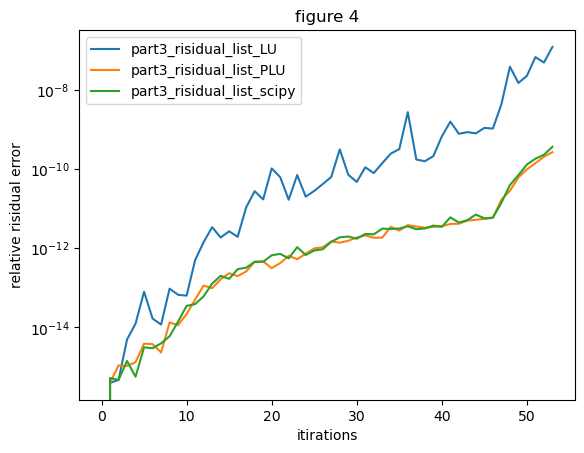

In [19]:
plt.figure() 

plt.plot(part3_risidual_list_LU, label='part3_risidual_list_LU')
plt.plot(part3_risidual_list_PLU, label='part3_risidual_list_PLU')
plt.plot(part3_risidual_list_scipy, label='part3_risidual_list_scipy')
plt.yscale("log")
# Extra information
plt.title('figure 4') # titre
plt.xlabel('itirations') # axes
plt.ylabel('relative risidual error') # axes
plt.legend() # legend

plt.show() # affiche la figure

In [20]:

part32_accuracy_list_LU = []
part32_accuracy_list_PLU = []
part32_accuracy_list_scipy = []

part32_risidual_list_LU = []
part32_risidual_list_PLU = []
part32_risidual_list_scipy = []


for i in range(2,10,1):
    H = np.zeros((i,i))
    for f in range(1,i+1):
        for g in range(1,i+1):
            H[f-1,g-1] = 1/(f+g-1)
    
    # verify if H is non singular
    if np.linalg.det(H):
        
        x_part3 = np.ones(i)
        b = np.dot(H,x_part3)
        
        H1 = H.copy()
        H2 = H.copy()
        H3 = H.copy()
        b1 = b.copy()
        b2 = b.copy()
        b3 = b.copy()
        
        x_hatLU = LinSolveLU(H1,b1)
        x_hatPLU = linSolve(H2,b2)
        Pscipy,Lscipy,Uscipy = lu_scipy(H3)
        x_hatScipy = lin.solve(Uscipy, lin.solve(Lscipy, np.transpose(Pscipy)@b3))
        
        part32_accuracy_list_LU.append(accuracy(x_part3, x_hatLU))
        part32_accuracy_list_PLU.append(accuracy(x_part3, x_hatPLU))
        part32_accuracy_list_scipy.append(accuracy(x_part3, x_hatScipy))
        
        part32_risidual_list_LU.append(residual(H, x_hatLU, b))
        part32_risidual_list_PLU.append(residual(H, x_hatPLU, b))
        part32_risidual_list_scipy.append(residual(H, x_hatScipy, b))

for i in range(11,200,5):
    H = np.zeros((i,i))
    for f in range(1,i+1):
        for g in range(1,i+1):
            H[f-1,g-1] = 1/(f+g-1)
    # verify if H is non singular
    if np.linalg.det(H):
        
        x_part3 = np.ones(i)
        b = np.dot(H,x_part3)
        
        H1 = H.copy()
        H2 = H.copy()
        H3 = H.copy()
        b1 = b.copy()
        b2 = b.copy()
        b3 = b.copy()
        
        x_hatLU = LinSolveLU(H1,b1)
        x_hatPLU = linSolve(H2,b2)
        Pscipy,Lscipy,Uscipy = lu_scipy(H3)
        x_hatScipy = lin.solve(Uscipy, lin.solve(Lscipy, np.transpose(Pscipy)@b3))
        
        part32_accuracy_list_LU.append(accuracy(x_part3, x_hatLU))
        part32_accuracy_list_PLU.append(accuracy(x_part3, x_hatPLU))
        part32_accuracy_list_scipy.append(accuracy(x_part3, x_hatScipy))
        
        part32_risidual_list_LU.append(residual(H, x_hatLU, b))
        part32_risidual_list_PLU.append(residual(H, x_hatPLU, b))
        part32_risidual_list_scipy.append(residual(H, x_hatScipy, b))    

for i in range(201,1000,50): 
    H = np.zeros((i,i))
    for f in range(1,i+1):
        for g in range(1,i+1):
            H[f-1,g-1] = 1/(f+g-1)
    # verify if H is non singular
    if np.linalg.det(H):
        
        x_part3 = np.ones(i)
        b = np.dot(H,x_part3)
        
        H1 = H.copy()
        H2 = H.copy()
        H3 = H.copy()
        b1 = b.copy()
        b2 = b.copy()
        b3 = b.copy()
        
        x_hatLU = LinSolveLU(H1,b1)
        x_hatPLU = linSolve(H2,b2)
        Pscipy,Lscipy,Uscipy = lu_scipy(H3)
        x_hatScipy = lin.solve(Uscipy, lin.solve(Lscipy, np.transpose(Pscipy)@b3))
        
        part32_accuracy_list_LU.append(accuracy(x_part3, x_hatLU))
        part32_accuracy_list_PLU.append(accuracy(x_part3, x_hatPLU))
        part32_accuracy_list_scipy.append(accuracy(x_part3, x_hatScipy))
        
        part32_risidual_list_LU.append(residual(H, x_hatLU, b))
        part32_risidual_list_PLU.append(residual(H, x_hatPLU, b))
        part32_risidual_list_scipy.append(residual(H, x_hatScipy, b))    

/tmp/ipykernel_55817/1034416162.py:63: LinAlgWarning: Ill-conditioned matrix (rcond=4.58903e-19): result may not be accurate.
  x_hatScipy = lin.solve(Uscipy, lin.solve(Lscipy, np.transpose(Pscipy)@b3))
/tmp/ipykernel_55817/1034416162.py:63: LinAlgWarning: Ill-conditioned matrix (rcond=5.4256e-19): result may not be accurate.
  x_hatScipy = lin.solve(Uscipy, lin.solve(Lscipy, np.transpose(Pscipy)@b3))
/tmp/ipykernel_55817/1034416162.py:63: LinAlgWarning: Ill-conditioned matrix (rcond=3.71479e-19): result may not be accurate.
  x_hatScipy = lin.solve(Uscipy, lin.solve(Lscipy, np.transpose(Pscipy)@b3))


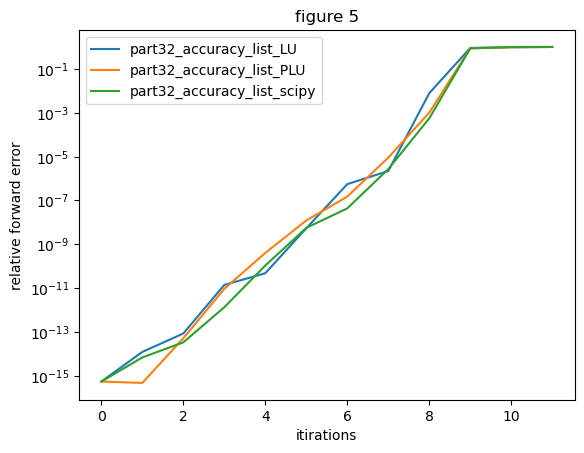

In [21]:
plt.figure() 

plt.plot(part32_accuracy_list_LU, label='part32_accuracy_list_LU')
plt.plot(part32_accuracy_list_PLU, label='part32_accuracy_list_PLU')
plt.plot(part32_accuracy_list_scipy, label='part32_accuracy_list_scipy')
plt.yscale("log")
# Extra information
plt.title('figure 5') # titre
plt.xlabel('itirations') # axes
plt.ylabel('relative forward error') # axes
plt.legend() # legend

plt.show() # affiche la figure

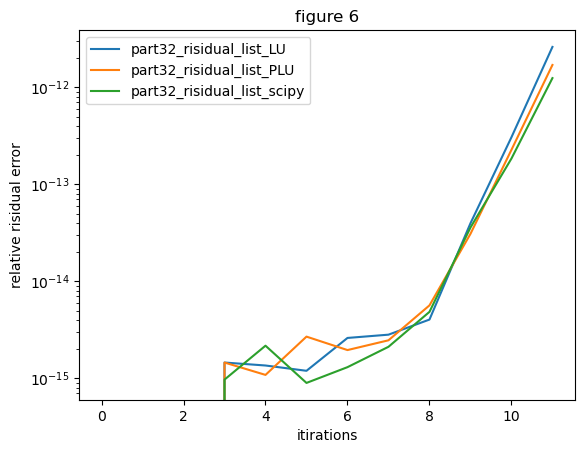

In [22]:
plt.figure() 

plt.plot(part32_risidual_list_LU, label='part32_risidual_list_LU')
plt.plot(part32_risidual_list_PLU, label='part32_risidual_list_PLU')
plt.plot(part32_risidual_list_scipy, label='part32_risidual_list_scipy')
plt.yscale("log")
# Extra information
plt.title('figure 6') # titre
plt.xlabel('itirations') # axes
plt.ylabel('relative risidual error') # axes
plt.legend() # legend

plt.show() # affiche la figure

# Report part 4
### Introduction
- Before part1, I implemented the two solvers for LU and PLU which both use forward and back subtitutions
- In this part 4, I will compare my LU and PLU solvers with scipy's solver.

### Summary
- I generated S in the same manner as A in other part but it has values between -1 and 1.
- I generated H in the same manner as A in other parts but I followed the requested formula to calculate its
- elements which is : $H_{ij} := \frac{1}{i+j-1}$
- I used 3 different for loops to generate random matrices and I used different steps in each loop as
- requested
- In each iteration, I copy the generated matrix S or H and the generated vector b in case my
- functions(in this part or the other parts) changed them.
- I called my plu and my LU solvers functions as well as scipy solver
- and I computed the relative risidual error and the relative forward error for all of them in each iteration.
- I plot the relative forward error of LU and PLU and scipy_LU in one figure.
- I plot the relative risidual error of LU and PLU and scipy_LU in another figure.
- I did that twice, with matrices H and with matrices S
- I plot the results unsing a logarithmic scale in y_axis.

### Discussion and interpretation
- The first graph shows that the LU's relative forward error is bigger than PLU's and scipy_LU's when the iterations increase.
- The second plot shows that the LU's relative risidual error is bigger than PLU's and scipy_LU's when the iterations increase.
- PLU and scipy_LU errors are alomst the same.
- The two last graph of H show that the errors of all solvers are close to each other.
- In summary: when I used the matrices S, I got the same results as when I used A in part 3
- When using the matrices H, I got closer errors and that is because the matrices are ill conditioned which also 
- mentioned by scipy compiler. So the results obtained when using H are not deterministic to compare the three solvers
- In conclusion, PLU decomposition is better beacause it has a lower relative forward and risidual error.